In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Core.IntensityModes import LaguerreGauss as Lg
from Core.IntensityModes import HermiteGauss as Hg
from Core.Metrics import Intensity as I, Power as Pwr, Phase as Phi

In [ ]:
# assim que vc add polarização
a = np.array([[[1.,2],[3,4],[5,6]],
              [[7,8],[9,10],[11,12]],
              [[13,14],[15,16],[17,18]]])

theta = np.pi/4

phase_mat = np.array([[np.cos(theta),-np.sin(theta)],
                      [np.sin(theta), np.cos(theta)]])
print(phase_mat[0,:] * a)

a[:,:,0] = np.sum(phase_mat[0,:] * a,axis=2)

print(a)

[[[  0.70710678  -1.41421356]
  [  2.12132034  -2.82842712]
  [  3.53553391  -4.24264069]]

 [[  4.94974747  -5.65685425]
  [  6.36396103  -7.07106781]
  [  7.77817459  -8.48528137]]

 [[  9.19238816  -9.89949494]
  [ 10.60660172 -11.3137085 ]
  [ 12.02081528 -12.72792206]]]
[[[-0.70710678  2.        ]
  [-0.70710678  4.        ]
  [-0.70710678  6.        ]]

 [[-0.70710678  8.        ]
  [-0.70710678 10.        ]
  [-0.70710678 12.        ]]

 [[-0.70710678 14.        ]
  [-0.70710678 16.        ]
  [-0.70710678 18.        ]]]


In [2]:
x = np.linspace(-.25e-2,.25e-2,1000)
y = np.linspace(-.25e-2,.25e-2,1000)
x,y = np.meshgrid(x,y)

fld = Field(x,y,0)

lg = Lg(1,1,x,y)
hg = Hg(0,4,x,y)

64519.80185170143


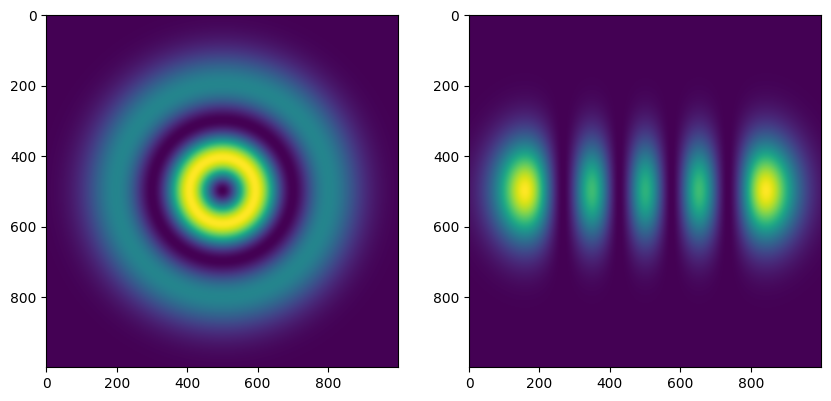

In [3]:
fig,axes = plt.subplots(1,2,figsize=(10, 6))
axes[0].imshow(lg.intensity())
axes[1].imshow(hg.intensity())
print(np.sum(lg.intensity()))

# Superposições
#### fazendo superposições de diferentes maneiras

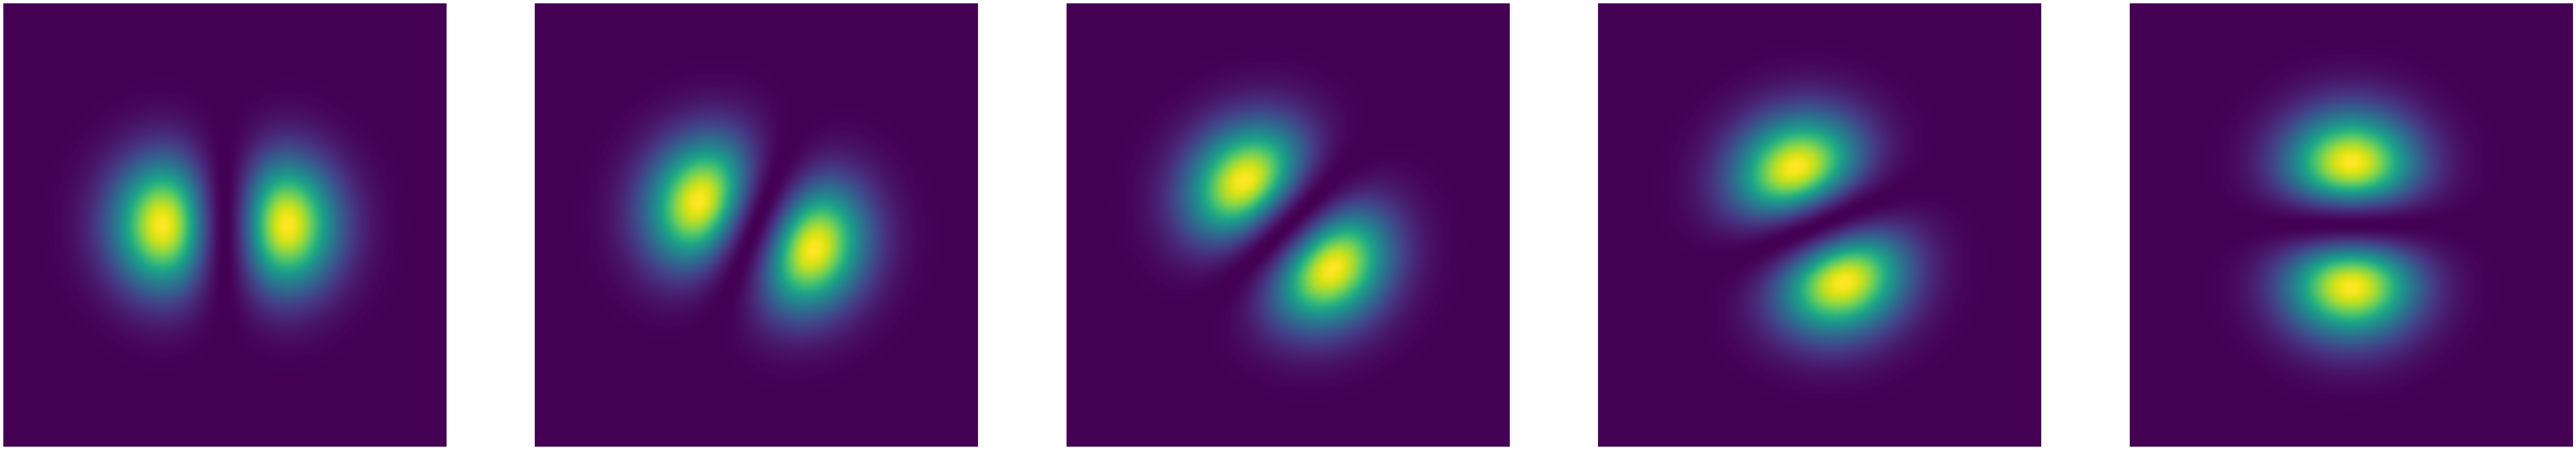

In [4]:
# superposição manual
hg1 = Hg(0,1,x,y)
hg2 = Hg(1,0,x,y)
fig,axes = plt.subplots(1,5,figsize=(100, 40))

for i,a in zip(range(5),np.linspace(0,np.pi/2,5)):
    field = np.cos(a)*hg1.E+np.sin(a)*hg2.E
    
    superposition = Field(x,y,0,E=field)

    axes[i].imshow(superposition.intensity())
    axes[i].set_axis_off()

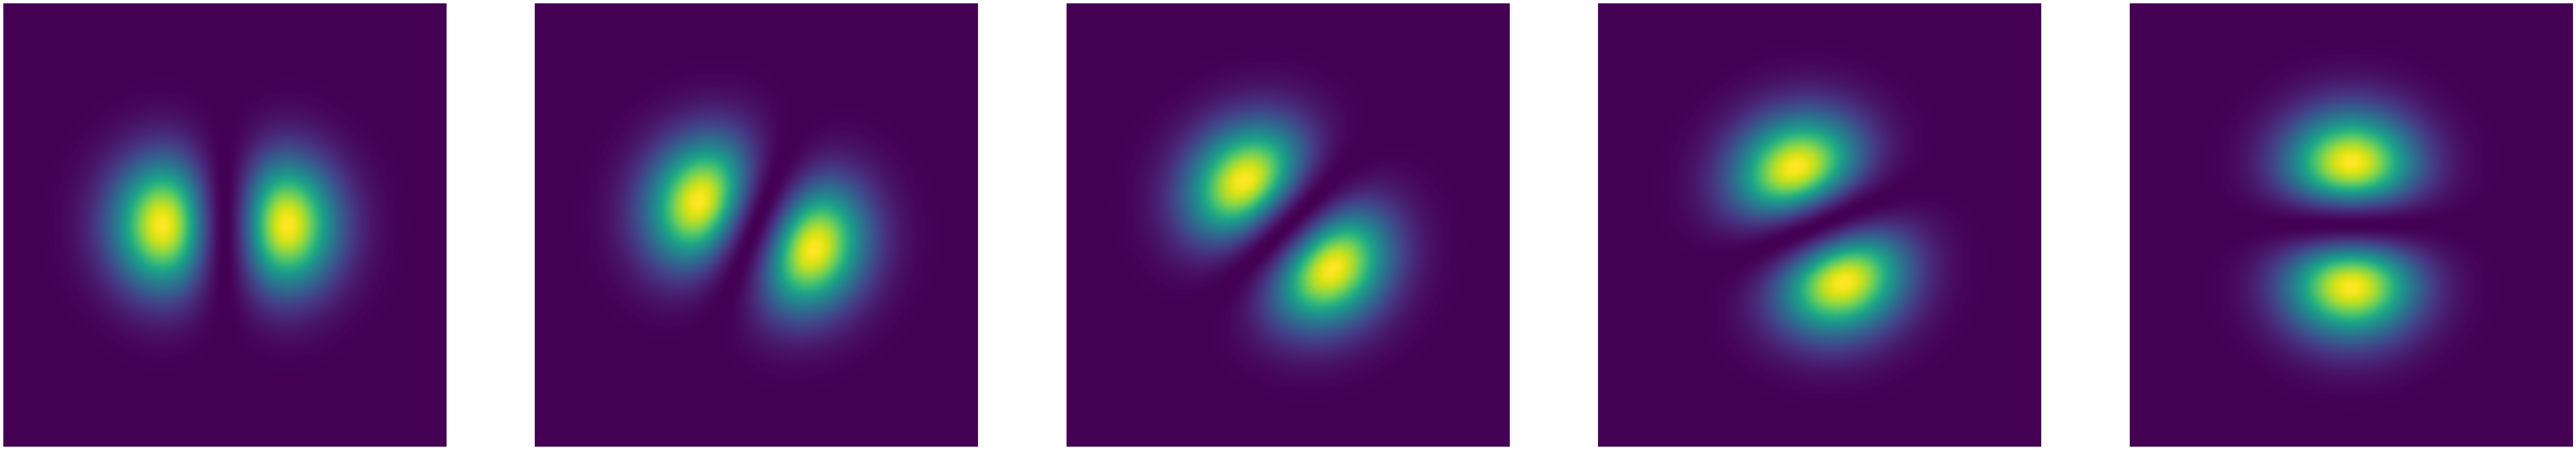

In [5]:
# usando a clase de superposição
fig,axes = plt.subplots(1,5,figsize=(100, 40))


for i,a in zip(range(5),np.linspace(0,np.pi/2,5)):

    modes = [dict(type='hg',n=1,coef=np.cos(a)),dict(type='hg',m=1,coef=np.sin(a))]
    superposition = Sp(modes,x,y)

    axes[i].imshow(superposition.intensity())
    axes[i].set_axis_off()

In [6]:
fld3 = Field(x,y,0)
lg = Lg(0,1,x,y,z=100,w0=0.001)
hg = Lg(0,0,x,y,z=0,w0=.04)

fld3.E = lg.E+hg.E

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

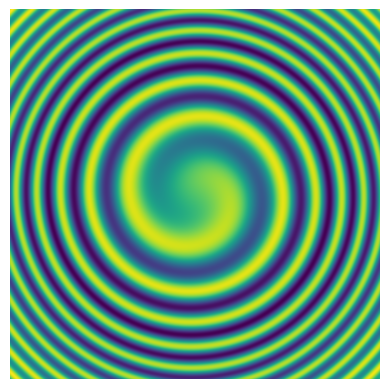

In [7]:
fld3 = Field(x,y,0)

hg = Hg(0,0,x,y,z=1,w0=0.000080)
lg = Lg(0,1,x,y,z=0,w0=10)

fld3.E = lg.E+hg.E
fld3.normalize()
plt.imshow(fld3.intensity())
plt.axis('off')

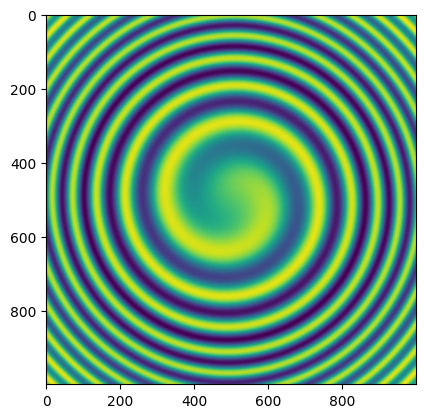

In [8]:
# problema: é possivel quebrar facilmente colocando números grandes (500000 modos, coeficientes enormes)
# lidar com isso, ou deixe que quem usa lide???????
mode1 = dict(type='hg',m=0,n=0,w0=0.000080,z=1)
mode2 = dict(type='lg',l=1,p=0,w0=10)
modes = [mode1,mode2]
sp = Sp(modes,x,y)
plt.imshow(sp.intensity())

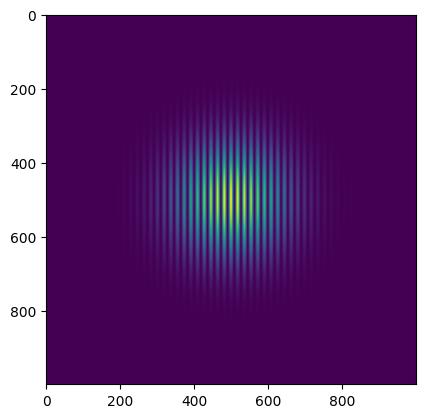

In [ ]:
# problema: é possivel quebrar facilmente colocando números grandes (500000 modos, coeficientes enormes)
# lidar com isso, ou deixe que quem usa lide???????
mode1 = dict(type='hg',thetax=.2*np.pi/180)
mode2 = dict(type='hg')
modes = [mode1,mode2]
sp = Sp(modes,x,y)
plt.imshow(sp.intensity())

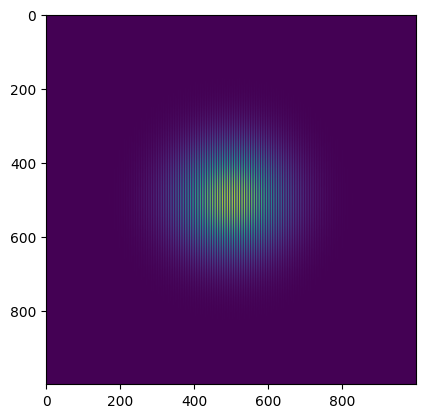

In [19]:
mode2 = dict(type='hg')
for i in range(100):
    mode1 = dict(type='hg',thetax=i/20)
    modes = [mode1,mode2]
    sp = Sp(modes,x,y)
    plt.imshow(sp.intensity())